## data loadinga and EDA

In [397]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [426]:
path_to_data = "/mnt/c/Users/Atena/Documents/Training/NLP/projects/0_Resume_Screening_with_Python/data/UpdatedResumeDataSet.csv"
resumeDataSet = pd.read_csv(path_to_data ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''

In [399]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [400]:
resumeDataSet.Category.value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [402]:
# check if there is repeated rows
print("original dataframe:",len(resumeDataSet))
print("dataframe_after_removing_duplicates", len(resumeDataSet.drop_duplicates(inplace=False)))

original dataframe: 962
dataframe_after_removing_duplicates 166


In [427]:
# remove duplicates
resumeDataSet_unique = resumeDataSet.drop_duplicates(inplace=False)

<Axes: xlabel='count', ylabel='Category'>

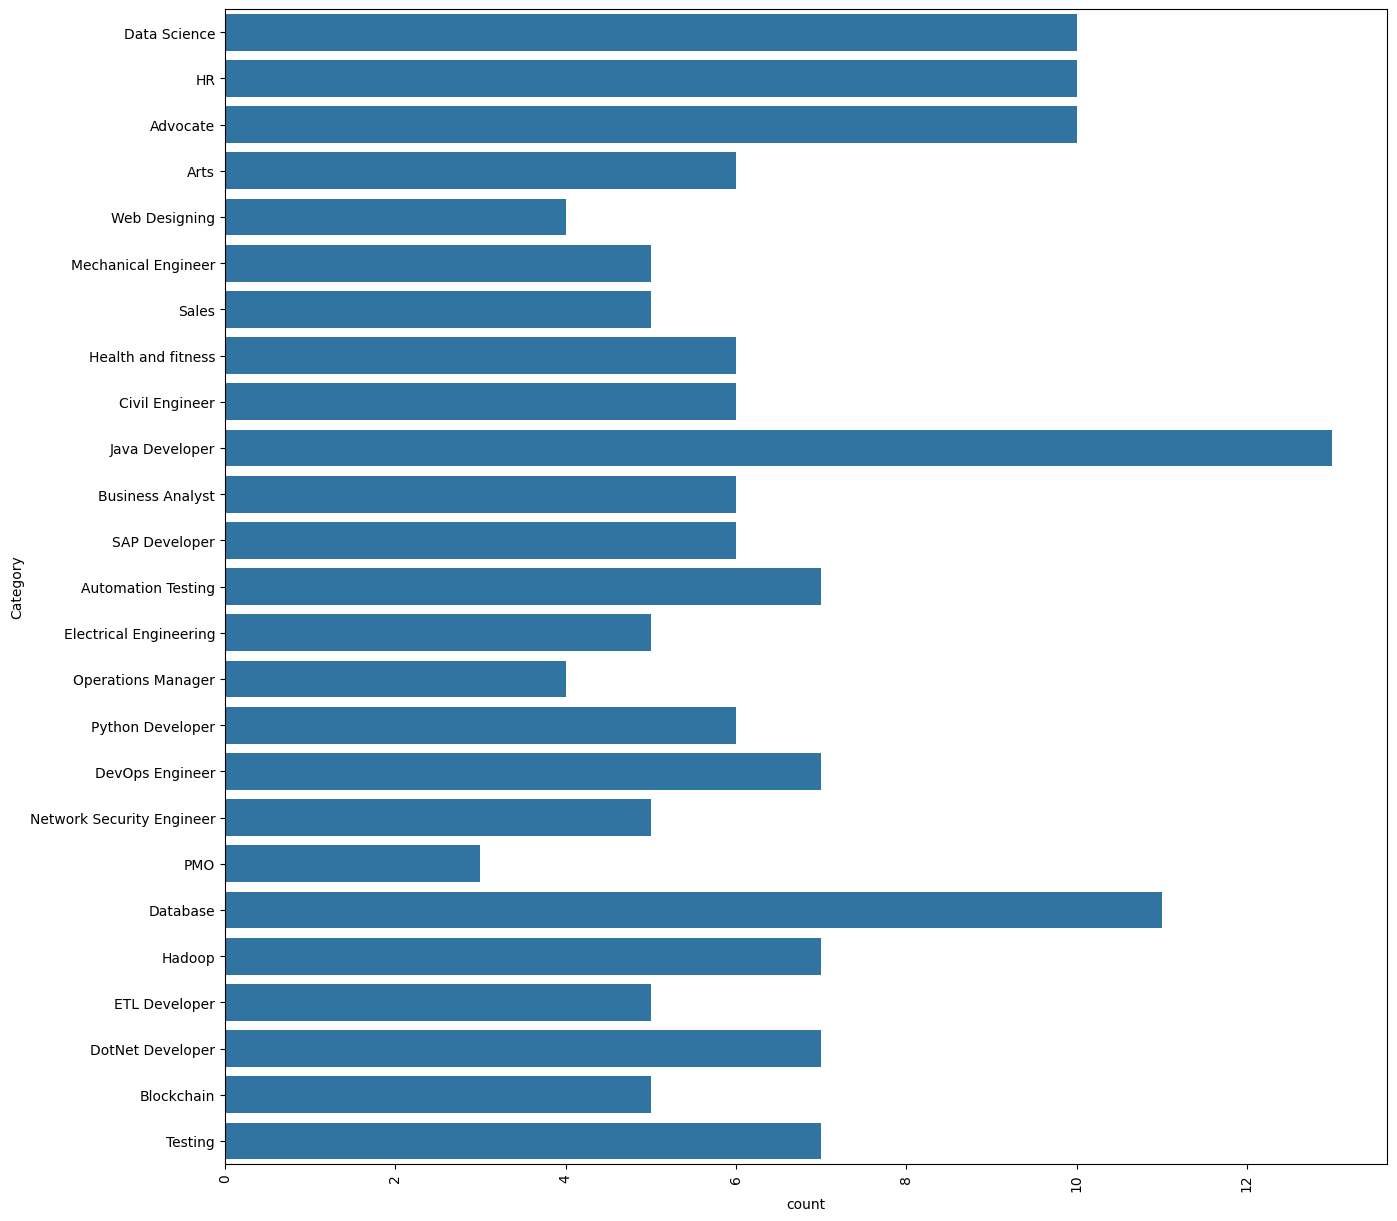

In [404]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet_unique)

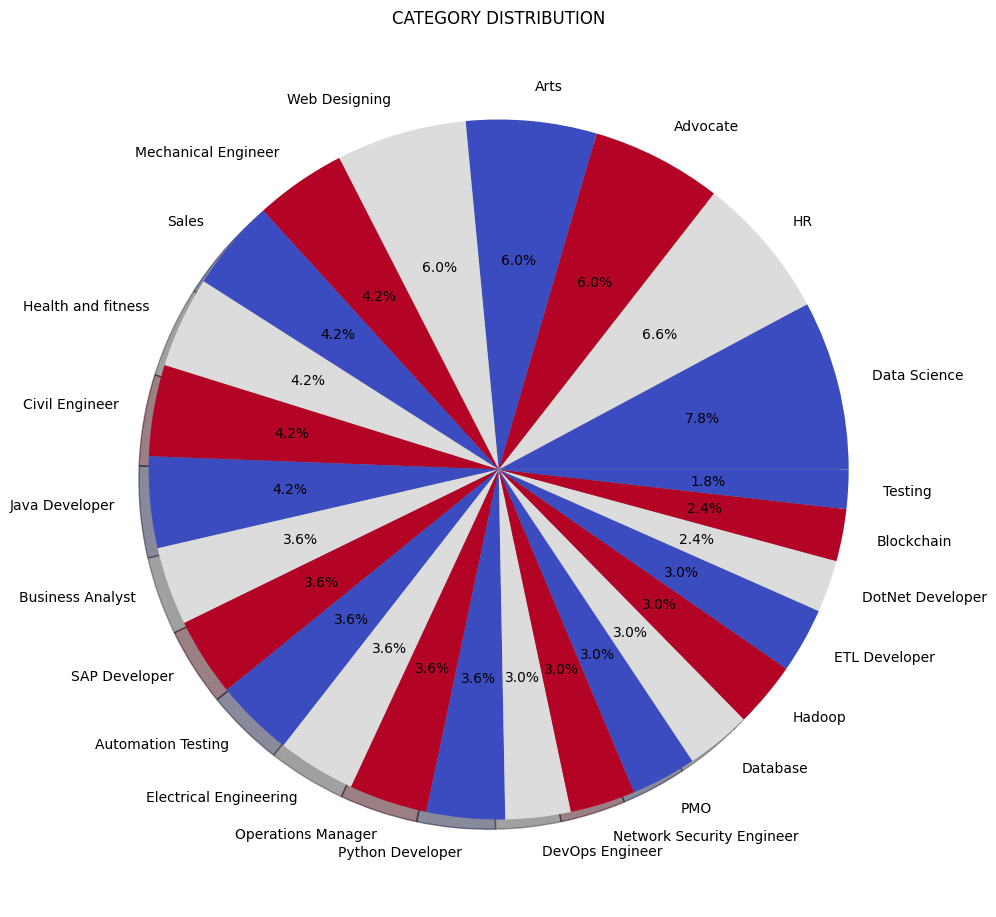

In [406]:

from matplotlib.gridspec import GridSpec
target_label = resumeDataSet_unique.Category.unique()
target_counts = resumeDataSet_unique.Category.value_counts()

plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(target_counts, labels=target_label, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

## data preprocessing

In [428]:
import re
def preprocessing(text):
    text= re.sub("http\S+\s*", " ", text) # remove Url links
    text=re.sub("@\S+", " ", text) # remove hashtags
    text=re.sub("#\S+", "", text) # remove #
    text=re.sub("\s+", " ", text) # remove whitespaces (tab, ..)
    text = re.sub(r'[^\x00-\x7f]',r' ', text) # remove non ASCII
    text=re.sub("RT|cc", " ", text) # remove Rt and cc
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = text.lower() # make all text lowers case
    return text
resumeDataSet_unique["cleaned_resume"] = resumeDataSet_unique.Resume.apply(lambda x: preprocessing(x) )
resumeDataSet_unique

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad hary...
...,...,...,...
894,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office ...
895,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges p...
896,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerne...
897,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power ...


## visualization

In [411]:
import nltk
from nltk.corpus import stopwords
import string

stop_words = stopwords.words("english")+ ['``', '""']
Sentences = resumeDataSet_unique.cleaned_resume.values
total_words = []
Sentences_all = ""
for i in range(len(resumeDataSet_unique)):
    sentence = Sentences[i]
    Sentences_all += sentence
    required_words =nltk.word_tokenize(sentence)   
    for word in required_words:
        if word not in stop_words and word not in string.punctuation and word not in string.digits: # considering the application 
            total_words.append(word)

In [417]:
from wordcloud import WordCloud, STOPWORDS
word_freq_dist = nltk.FreqDist(total_words)
most_common = word_freq_dist.most_common()
print(most_common)

[('exprience', 616), ('company', 603), ('project', 542), ('description', 540), ('details', 531), ('months', 525), ('data', 391), ('management', 318), ('database', 278), ('team', 273), ('system', 239), ('sql', 235), ('year', 228), ('maharashtra', 228), ('testing', 216), ('using', 210), ('test', 206), ('business', 205), ('ltd', 201), ('less', 200), ('january', 190), ('skill', 189), ('server', 186), ('development', 182), ('java', 176), ('developer', 176), ('client', 166), ('engineering', 162), ('skills', 161), ('c', 160), ('pune', 159), ('work', 153), ('application', 151), ('pvt', 149), ('education', 148), ('responsibilities', 148), ('software', 147), ('university', 144), ('environment', 140), ('technical', 136), ('reports', 130), ('india', 129), ('working', 127), ('services', 126), ('monthscompany', 125), ('like', 125), ('various', 122), ('web', 121), ('requirements', 121), ('sales', 118), ('design', 117), ('automation', 117), ('technologies', 116), ('python', 113), ('college', 112), ('r

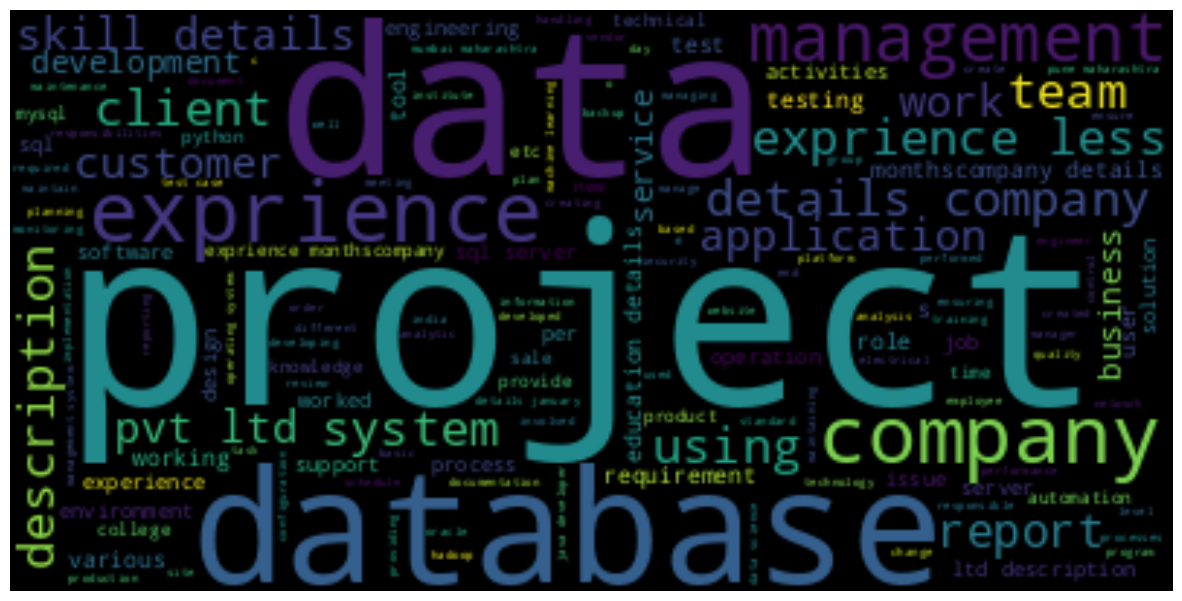

In [424]:
custom_stopwords =set(STOPWORDS)
custom_stopwords.update(["months", "years", "year"])
wc = WordCloud(stopwords=custom_stopwords).generate(Sentences_all)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Model training

### classical ML approaches

#### data prep

In [431]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
resumeDataSet_unique["Category_categorical"] = le.fit_transform(resumeDataSet_unique["Category"])

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer

required_text = resumeDataSet_unique.cleaned_resume.values
required_target = resumeDataSet_unique.Category_categorical.values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(required_text)
word_fetures = word_vectorizer.transform(required_text)

In [432]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(word_fetures, required_target, random_state = 42, test_size = 0.2)

print (X_train.shape)
print(X_test.shape)

(132, 1500)
(34, 1500)


knearst 

In [312]:
# k-nearest
# works well for two resons: 1. k-nearest is an instance-based algorithm which does not calculate parameters instead
# find the closest possibility to the training set, as we represent the text using FT-IDF, it is actually usefull
# to calculate distance to the tarinset
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of KNeighbors Classifier on training set: 0.90
Accuracy of KNeighbors Classifier on test set: 0.85


In [313]:
# logistic regression
# logistic regression did not work for two reasons: 
# 1. logistic regression is linear model but features (words) in text have non-linear pattern
# 2. the srong assumption in logistic regression is teher is no correlation between features,
#    but words in text they can have strong correlation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of KNeighbors Classifier on training set: 0.92
Accuracy of KNeighbors Classifier on test set: 0.29


In [314]:
# Naive byas
from sklearn.naive_bayes  import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of KNeighbors Classifier on training set: 0.65
Accuracy of KNeighbors Classifier on test set: 0.18


In [318]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, Y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, Y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set: 0.79


## Deep learning approach

In [438]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization and padding
max_words = 5000
max_seq_length = 1000


tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(resumeDataSet_unique['cleaned_resume'])
X = tokenizer.texts_to_sequences(resumeDataSet_unique['cleaned_resume'])
X = pad_sequences(X, maxlen=max_seq_length, padding='post', truncating='post')

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(resumeDataSet_unique['Category'])
y = to_categorical(y)



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_seq_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
epochs = 50
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.0250 - loss: 3.2211 - val_accuracy: 0.0000e+00 - val_loss: 3.2222
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 828ms/step - accuracy: 0.0403 - loss: 3.2140 - val_accuracy: 0.0294 - val_loss: 3.2242
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 759ms/step - accuracy: 0.0962 - loss: 3.1979 - val_accuracy: 0.0294 - val_loss: 3.2300
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 786ms/step - accuracy: 0.1020 - loss: 3.1924 - val_accuracy: 0.0294 - val_loss: 3.2386
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 751ms/step - accuracy: 0.0980 - loss: 3.1835 - val_accuracy: 0.0294 - val_loss: 3.2477
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 879ms/step - accuracy: 0.1137 - loss: 3.1760 - val_accuracy: 0.0294 - val_loss: 3.2577
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 778ms/step - accuracy: 0.1133 - loss: 3.1751 - val_accuracy: 0.0294 - val_loss: 3.2726
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 766ms/step - accuracy: 0.1213 - loss: 3.1644 - val_accuracy: 0.0294 - val_los